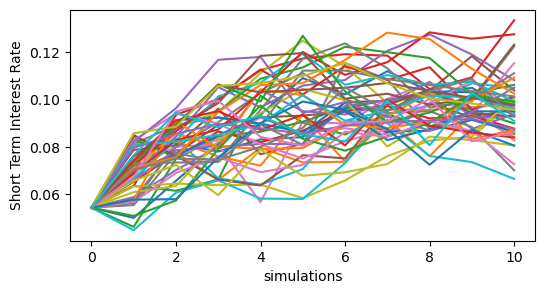

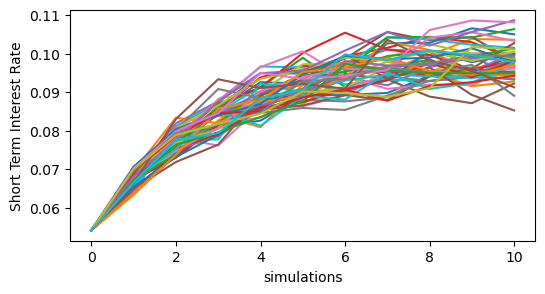

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

#Implementing Vasicek and CIR Models with variables a,b and sigma

num_simulations = 50

def vasicek(intialInterestRate,a,b,s,timeToMaturity=1,NumberOfSteps=10,numberOfSimulations=num_simulations):
    deltaTime = timeToMaturity/float(NumberOfSteps)
    simulations = []

    for _ in range(numberOfSimulations):
        interestRates = [intialInterestRate]
        for _ in range(NumberOfSteps):
            deltaInterestRate = a*(b-interestRates[-1])*deltaTime+s*np.random.normal()
            interestRates.append(interestRates[-1]+deltaInterestRate)
        simulations.append(interestRates)
    
    return np.array(simulations)

def CIR(intialInterestRate,a,b,s,timeToMaturity=1,NumberOfSteps=10,numberOfSimulations=num_simulations):
    deltaTime = timeToMaturity/float(NumberOfSteps)
    simulations = []
    for _ in range(numberOfSimulations):
        interestRates = [intialInterestRate]
        for _ in range(NumberOfSteps):
            deltaInterestRate = a*(b-interestRates[-1])*deltaTime+m.sqrt(abs(interestRates[-1]))*s*np.random.normal()
            interestRates.append(interestRates[-1]+deltaInterestRate)
        simulations.append(interestRates)
    return np.array(simulations)

r_0 = 0.0542
a = 0.0284
b = 0.0507
sigma = 0.0792
Maturity = 30

df_vasicek = vasicek(r_0,0.1,0.1,0.01,Maturity)
#df_vasicek = vasicek(r_0,a,b,sigma,Maturity)
#print(df_vasicek)

plt.figure(figsize=(6,3))
for i in range(num_simulations):
    plt.plot(df_vasicek[i])

plt.xlabel('simulations')
plt.ylabel('Short Term Interest Rate')
plt.show()

df_CIR = CIR(r_0,0.1,0.1,0.01,Maturity)

plt.figure(figsize=(6,3))
for i in range(num_simulations):
    plt.plot(df_CIR[i])

plt.xlabel('simulations')
plt.ylabel('Short Term Interest Rate')
plt.show()


